In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e2/sample_submission.csv
/kaggle/input/playground-series-s5e2/train.csv
/kaggle/input/playground-series-s5e2/test.csv
/kaggle/input/playground-series-s5e2/training_extra.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/playground-series-s5e2/train.csv")
train_extra_data = pd.read_csv("/kaggle/input/playground-series-s5e2/training_extra.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")

In [3]:
## let's look at training data
print(train_data.shape)
print(train_data.info())
train_data.head()

(300000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB
None


,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [4]:
print(train_data.isnull().sum())

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64


In [5]:
## let's look at training extra
print(train_extra_data.shape)
print(train_extra_data.info())
train_extra_data.head()

(3694318, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694318 entries, 0 to 3694317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 310.0+ MB
None


,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
1,500001,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
2,500002,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
3,500003,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
4,500004,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461


In [6]:
print(train_extra_data.isnull().sum())

id                           0
Brand                   117053
Material                102615
Size                     81190
Compartments                 0
Laptop Compartment       91089
Waterproof               87274
Style                    96210
Color                   123667
Weight Capacity (kg)      1670
Price                        0
dtype: int64


In [7]:
## So let's start with merging these training data
train_data = pd.concat([train_data, train_extra_data], ignore_index=True)

In [8]:
print(train_data.shape)
print(train_data.info())
train_data.head()

(3994318, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 335.2+ MB
None


,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [9]:
print(train_data.isnull().sum())


id                           0
Brand                   126758
Material                110962
Size                     87785
Compartments                 0
Laptop Compartment       98533
Waterproof               94324
Style                   104180
Color                   133617
Weight Capacity (kg)      1808
Price                        0
dtype: int64


In [10]:
## We can see that Compartments is a categorical variable, as we go through EDA, so converting it 
train_data["Compartments"] = train_data["Compartments"].astype("category")
## Let's seperate different types of columns
continuous_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_data.select_dtypes(include=['object', 'category']).columns.tolist()


In [11]:
print("continuous columns: ", continuous_cols)
print("categorical columns: ", categorical_cols)

continuous columns:  ['id', 'Weight Capacity (kg)', 'Price']
categorical columns:  ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']


## Analyze Continous Columns

In [12]:
train_data[continuous_cols].describe()

,id,Weight Capacity (kg),Price
count,3.994318e+06,3.992510e+06,3.994318e+06
mean,2.182137e+06,1.801042e+01,8.136217e+01
std,1.178058e+06,6.973969e+00,3.893868e+01
min,0.000000e+00,5.000000e+00,1.500000e+01
25%,1.198579e+06,1.206896e+01,4.747002e+01
50%,2.197158e+06,1.805436e+01,8.098495e+01
75%,3.195738e+06,2.398751e+01,1.148550e+02
max,4.194317e+06,3.000000e+01,1.500000e+02


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


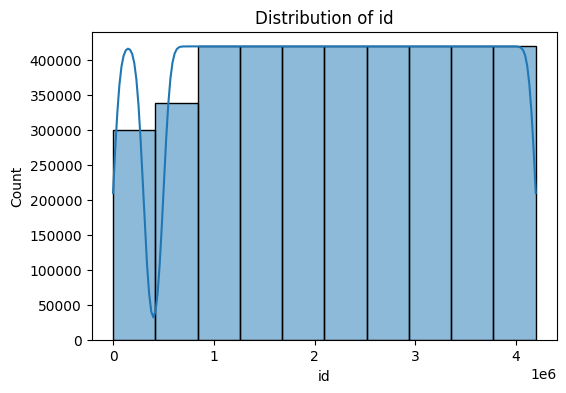

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


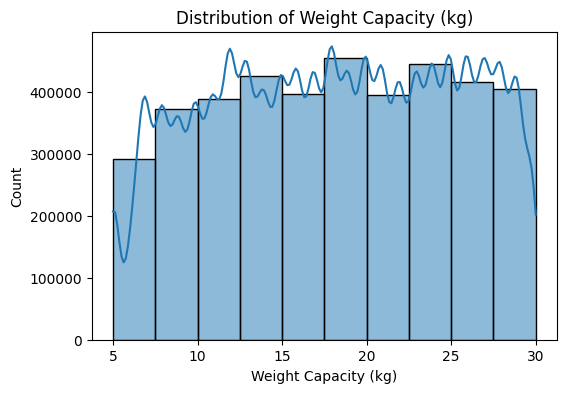

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


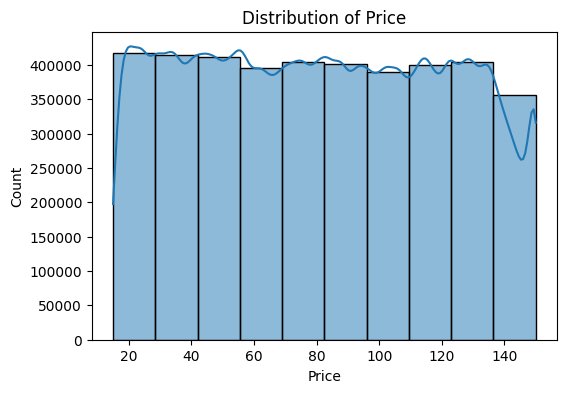

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in continuous_cols:
    
    plt.figure(figsize=(6, 4))
    sns.histplot(train_data[col], kde=True, bins=10)
    plt.title(f"Distribution of {col}")
    plt.show()

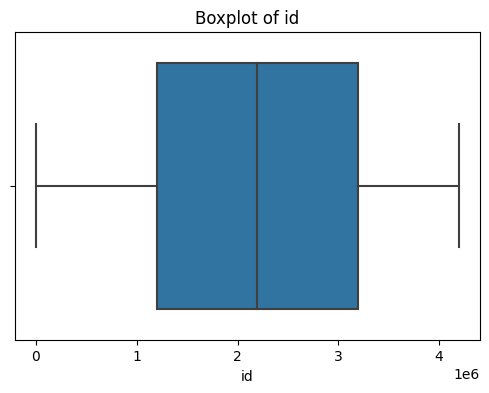

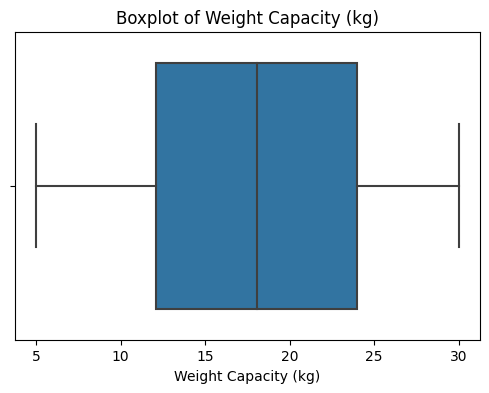

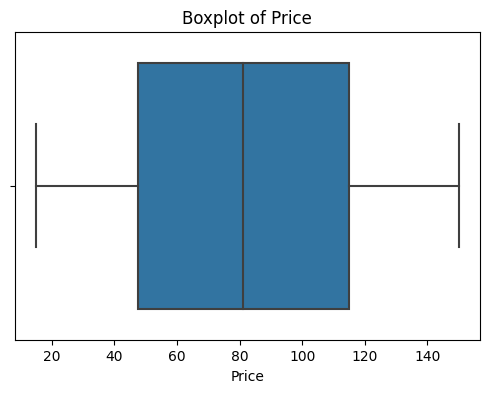

In [14]:
for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

<Axes: >

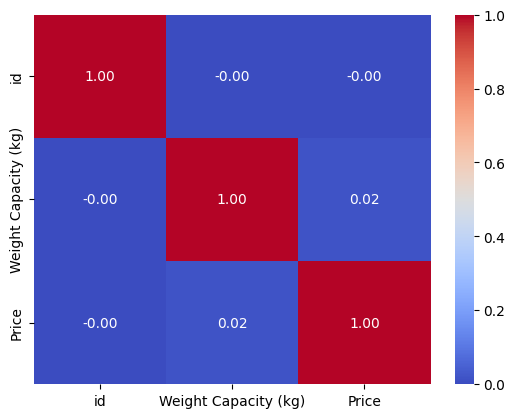

In [15]:
import numpy as np
corr = train_data[continuous_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

## Analyze Categorical Variables

In [16]:
for col in categorical_cols:
    print(f"\n{col}:\n", train_data[col].value_counts())


Brand:
 Brand
Under Armour    801035
Adidas          797000
Nike            764407
Puma            755778
Jansport        749340
Name: count, dtype: int64

Material:
 Material
Polyester    1060882
Leather       976186
Nylon         942656
Canvas        903632
Name: count, dtype: int64

Size:
 Size
Medium    1354487
Large     1312295
Small     1239751
Name: count, dtype: int64

Compartments:
 Compartments
1.0     423577
4.0     417246
2.0     408150
3.0     406796
7.0     400824
5.0     399418
9.0     398192
10.0    396303
8.0     383172
6.0     360640
Name: count, dtype: int64

Laptop Compartment:
 Laptop Compartment
Yes    1972937
No     1922848
Name: count, dtype: int64

Waterproof:
 Waterproof
Yes    1969205
No     1930789
Name: count, dtype: int64

Style:
 Style
Messenger    1329677
Tote         1297942
Backpack     1262519
Name: count, dtype: int64

Color:
 Color
Pink     688257
Gray     666110
Blue     638485
Red      630215
Black    620610
Green    617024
Name: count, dtype: in

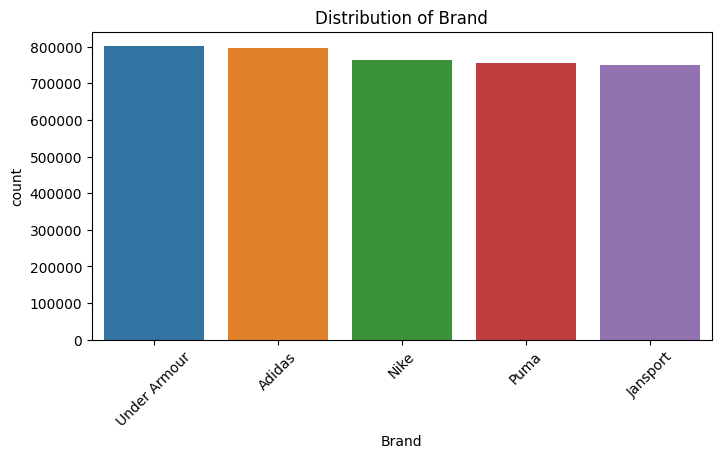

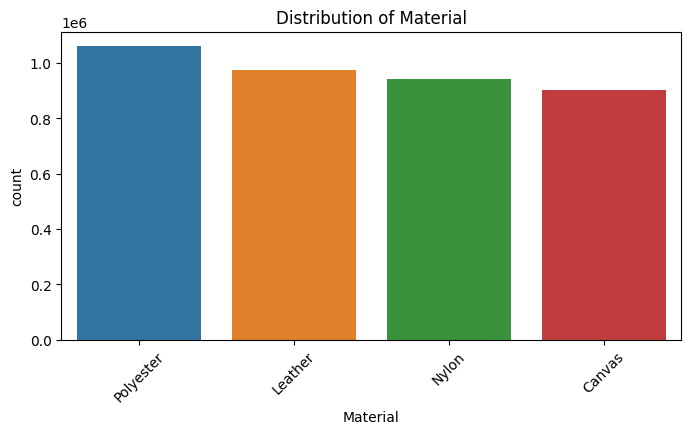

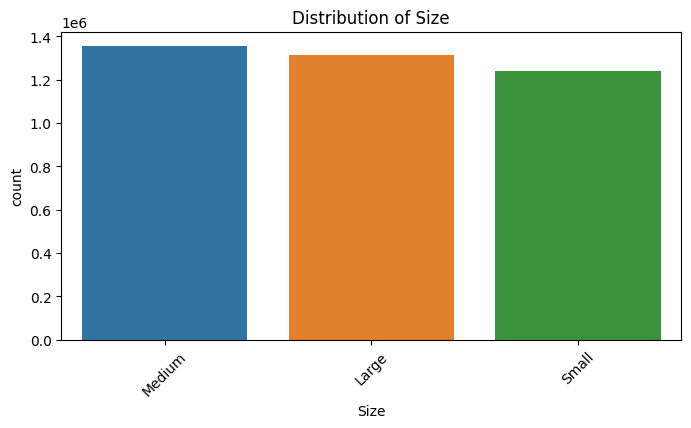

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


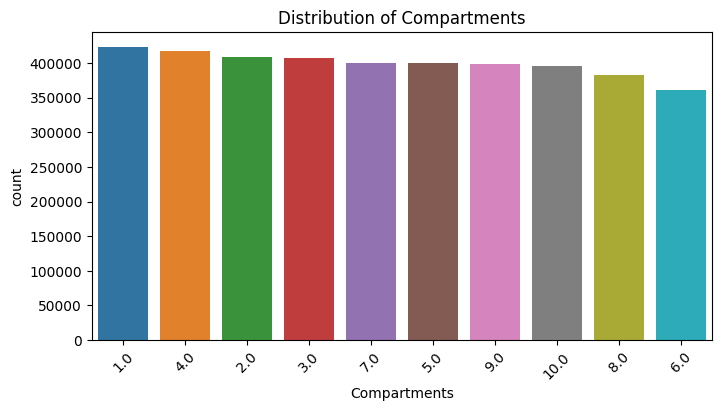

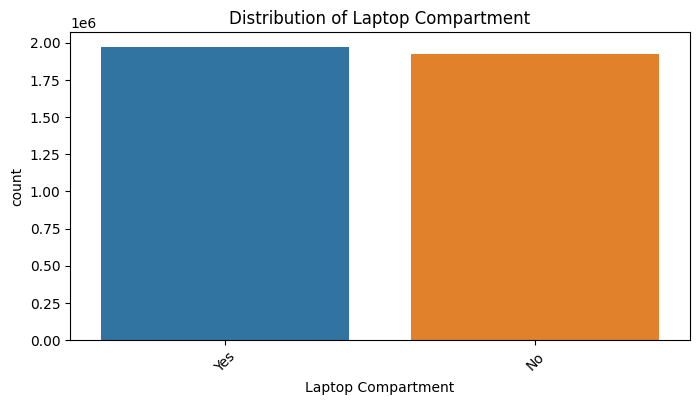

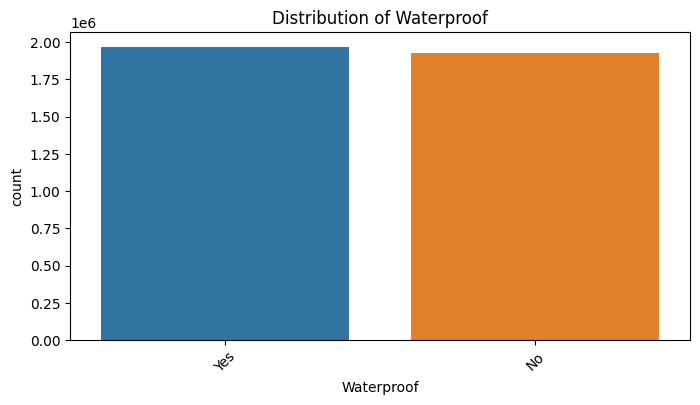

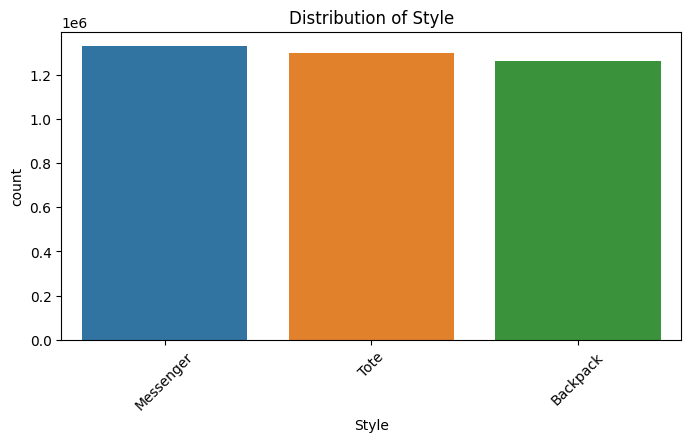

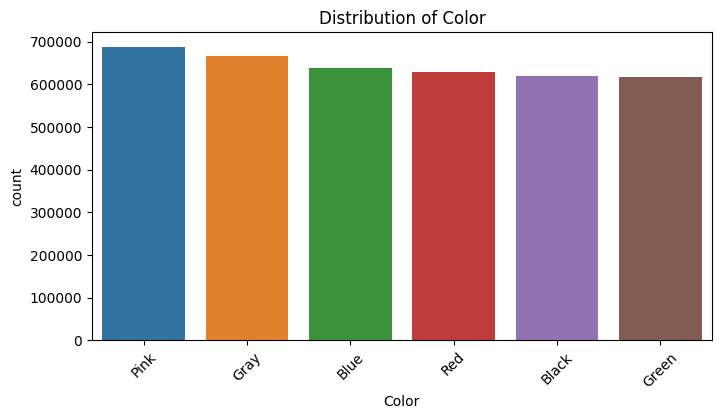

In [17]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=train_data[col], order=train_data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()

## Analyze Relationships
### Continuous vs Continuous (Scatter Plot)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


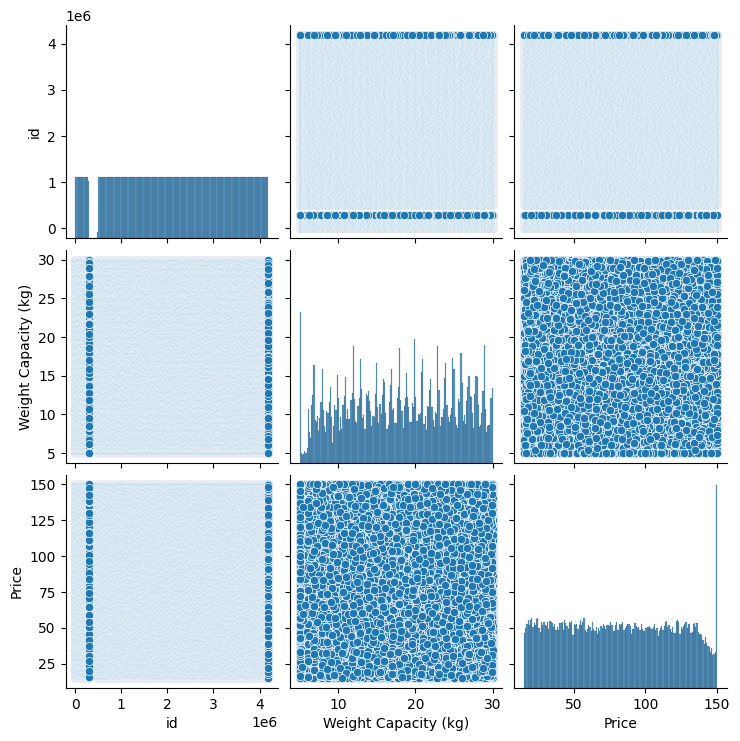

In [18]:
sns.pairplot(train_data[continuous_cols])

### Continuous vs Categorical (Box Plot)

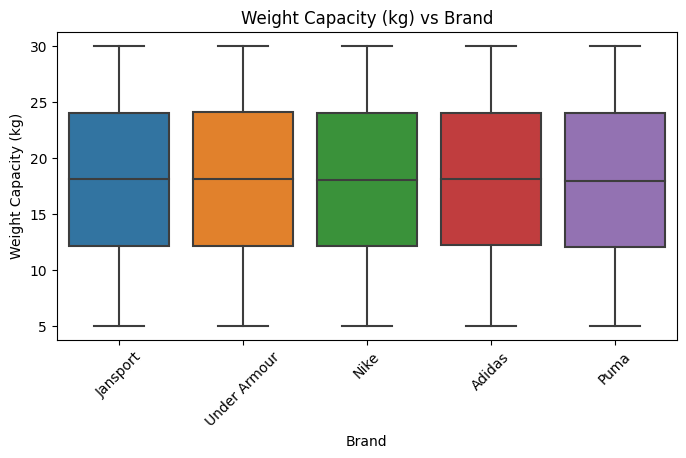

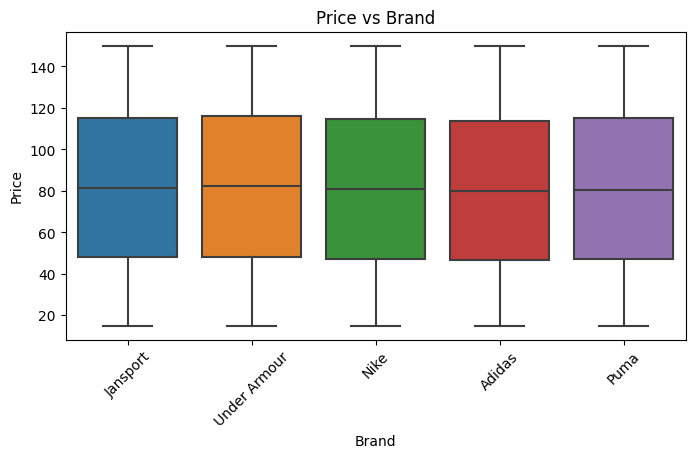

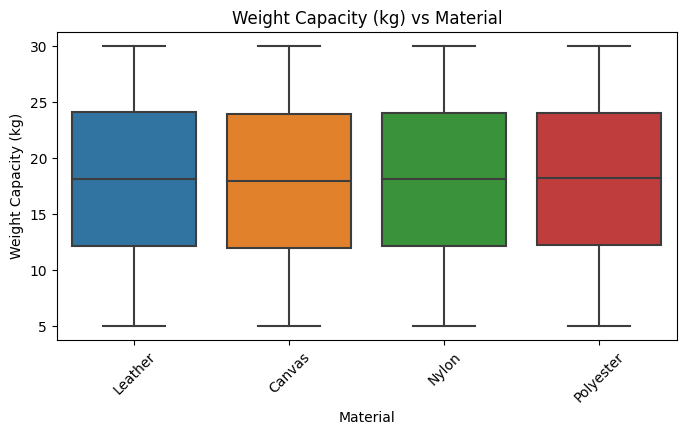

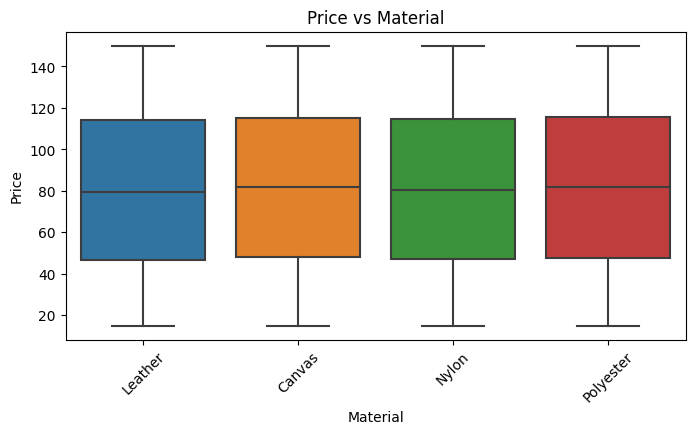

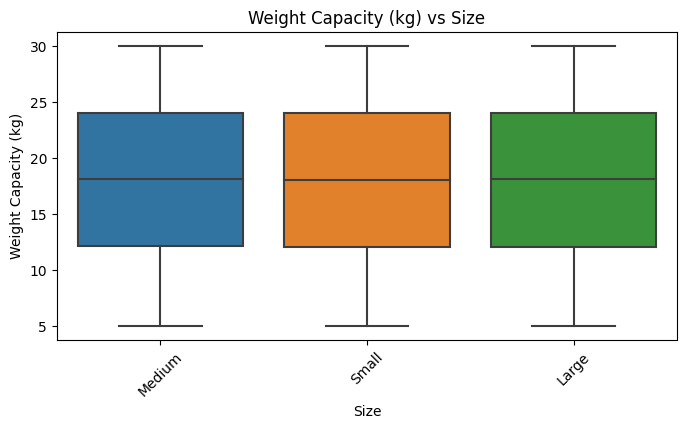

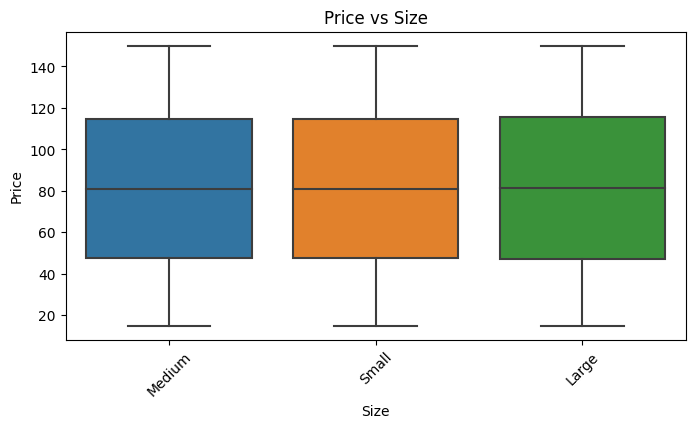

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


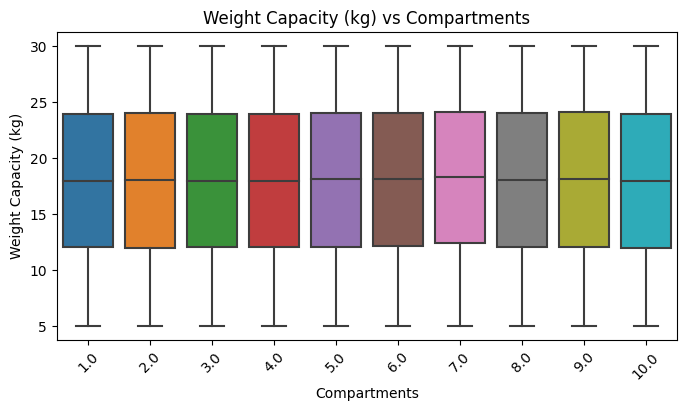

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


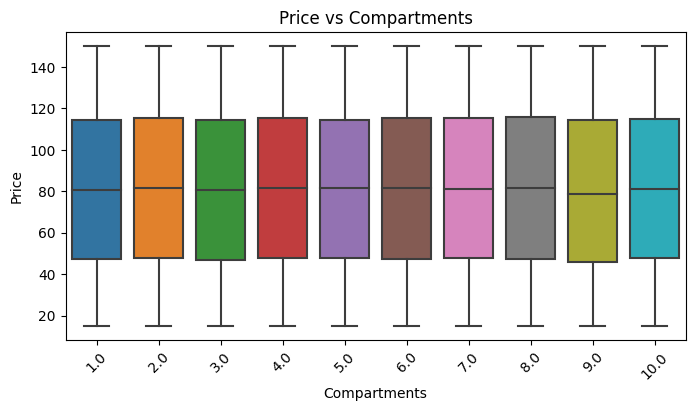

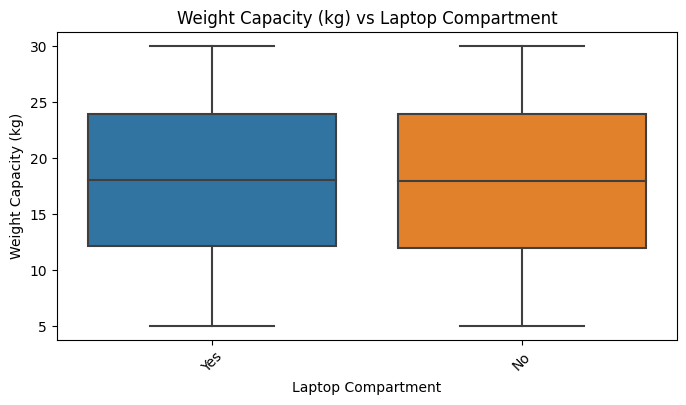

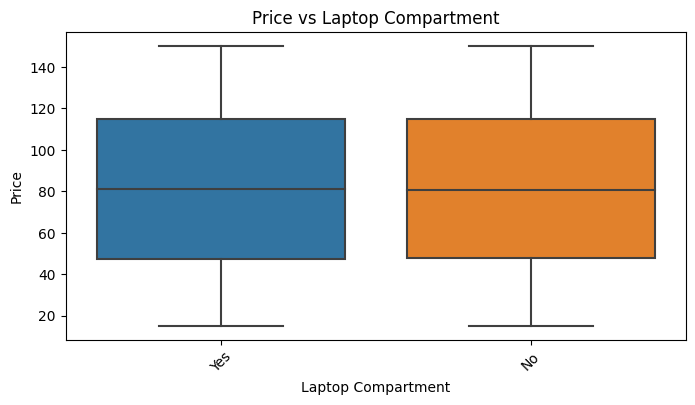

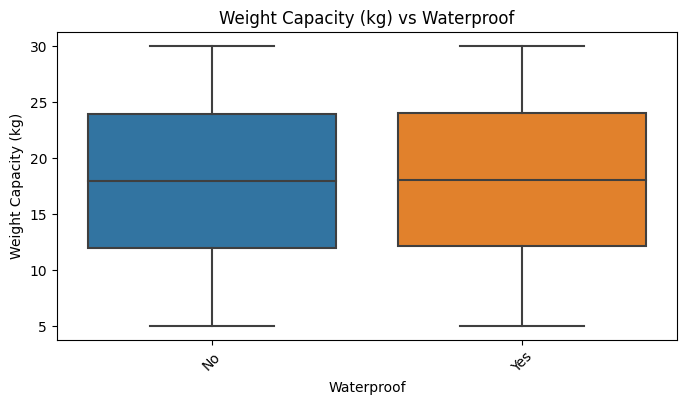

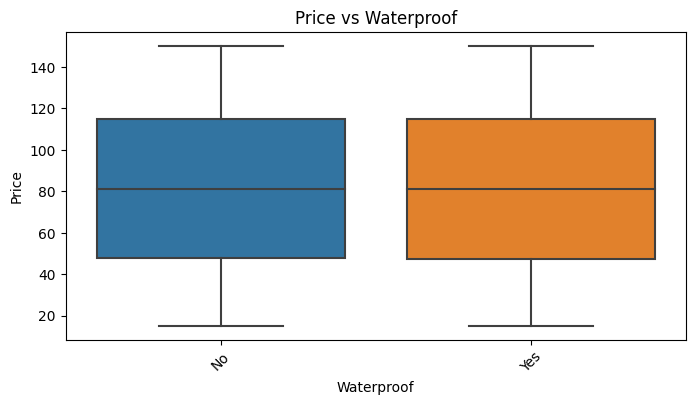

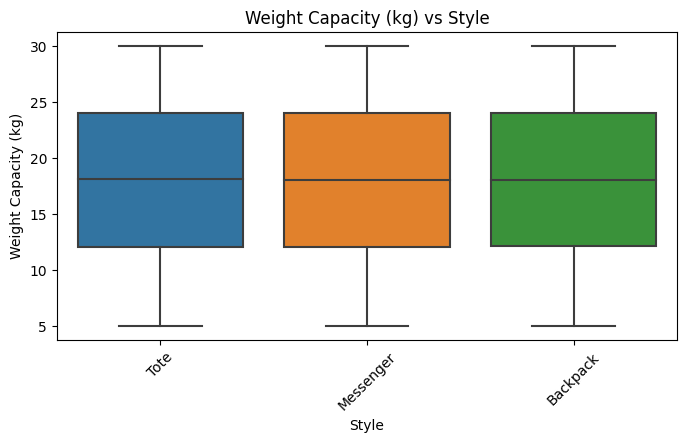

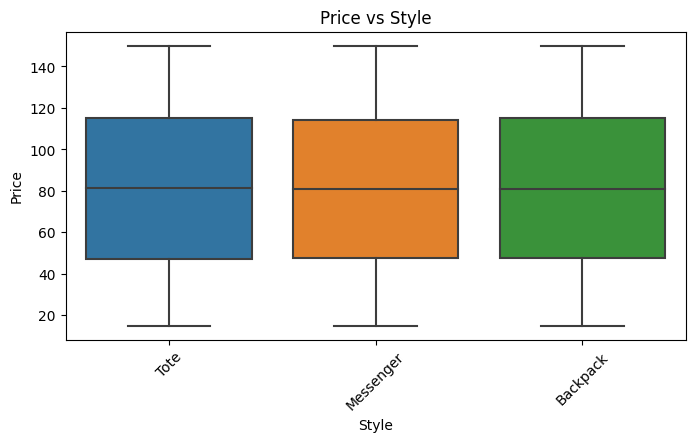

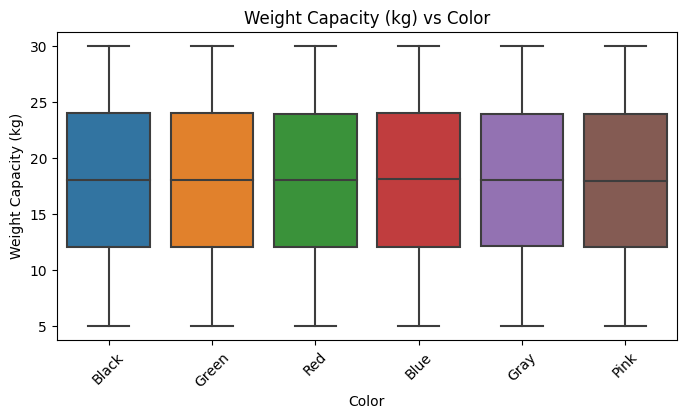

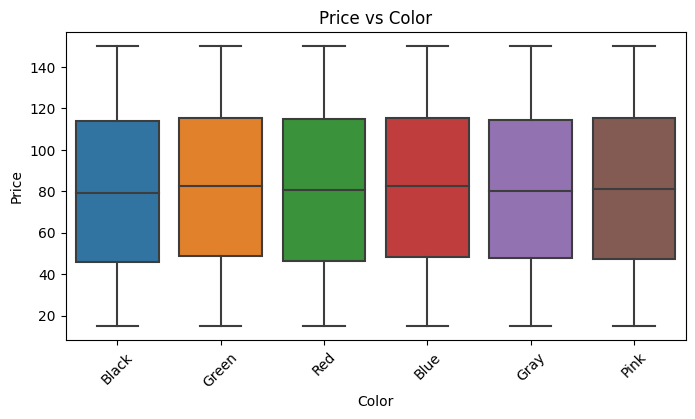

In [19]:
for col in categorical_cols:
    for cont_col in continuous_cols:
        if cont_col != "id":
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=train_data[col], y=train_data[cont_col])
            plt.xticks(rotation=45)
            plt.title(f"{cont_col} vs {col}")
            plt.show()

So as of now, the patterns that we have found in the data are,
1. Weight Capacity is weakly co-related to price.
   

## Distribution of Price

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


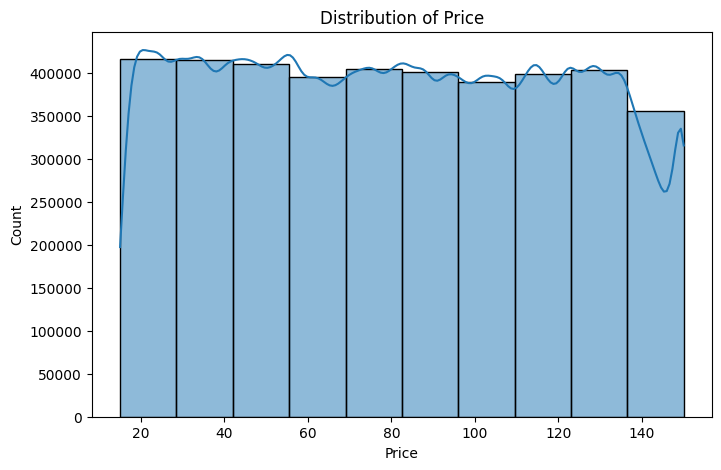

In [20]:

plt.figure(figsize=(8, 5))
sns.histplot(train_data["Price"], bins=10, kde=True)
plt.title("Distribution of Price")
plt.show()

In [21]:
print(train_data["Price"].skew())

0.03695777580374235


In [22]:
print(train_data["Price"].describe().round(2))

count    3994318.00
mean          81.36
std           38.94
min           15.00
25%           47.47
50%           80.98
75%          114.86
max          150.00
Name: Price, dtype: float64


In [23]:
print(train_data["Weight Capacity (kg)"].skew())

-0.061311470283035276


## Handling Missing values

### Numerical features

In [24]:
for col in continuous_cols:
    train_data.fillna({col : train_data[col].mean()}, inplace=True)

### Categorical features

In [25]:
for col in categorical_cols:
    train_data[col] = train_data[col].astype("category")  # Ensure it's categorical
    if "unknown" not in train_data[col].cat.categories:
        train_data[col] = train_data[col].cat.add_categories(["unknown"])  # Add "unknown"
    train_data.fillna({col : "unknown"}, inplace=True)  # Now, fill missing values

So re-ran the EDA scripts again, to find any changes. \
No new pattern was found.


## Feature Importance (using XGBoost)
Find the most important features.


In [26]:
from xgboost import XGBRegressor

def get_feature_importance(data):

    # data = data.sample(frac=0.1, random_state=42)
    X = data.drop("Price", axis=1)
    y = data["Price"]

    X = pd.get_dummies(X, drop_first=True) 

    model = XGBRegressor(n_estimators=100, tree_method="hist", device="cuda", random_state=42, eval_metric = "rmse")
    model.fit(X, y)

    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances.sort_values(ascending=True).plot(kind="barh", figsize=(10, 6), color="pink")
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title("Feature Importance")
    plt.show()


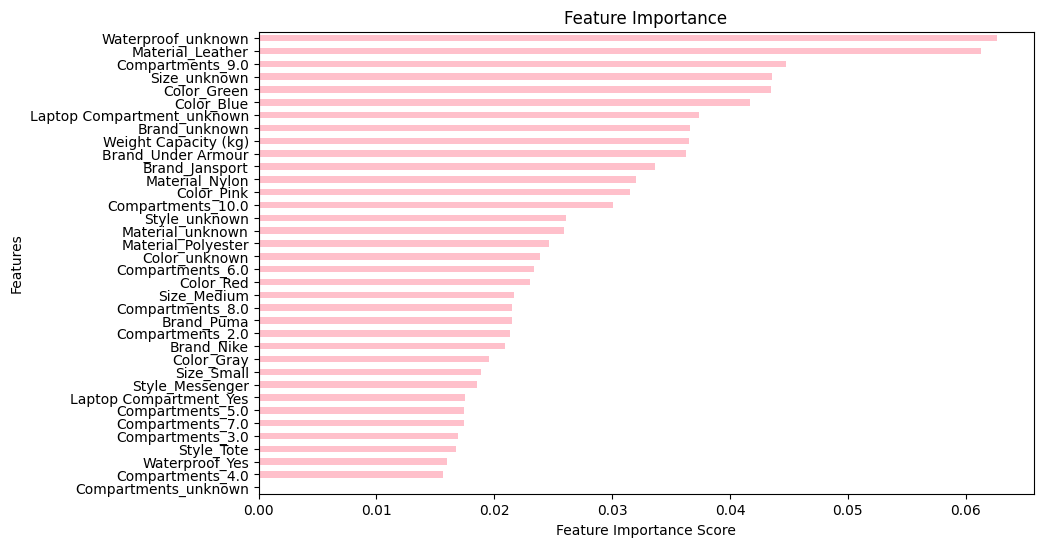

In [27]:
curr_train_data = train_data.drop("id", axis=1)
get_feature_importance(curr_train_data)

## Feature Enginerring
Let's try some Feature Engineering

In [28]:
## This method automatically creates bins with equal data distribution.
train_data["Weight Class"] = pd.qcut(train_data["Weight Capacity (kg)"], q=5, labels=['Light', 'Middle', 'Light_heavy', 'Middel_heavy','Heavy'])


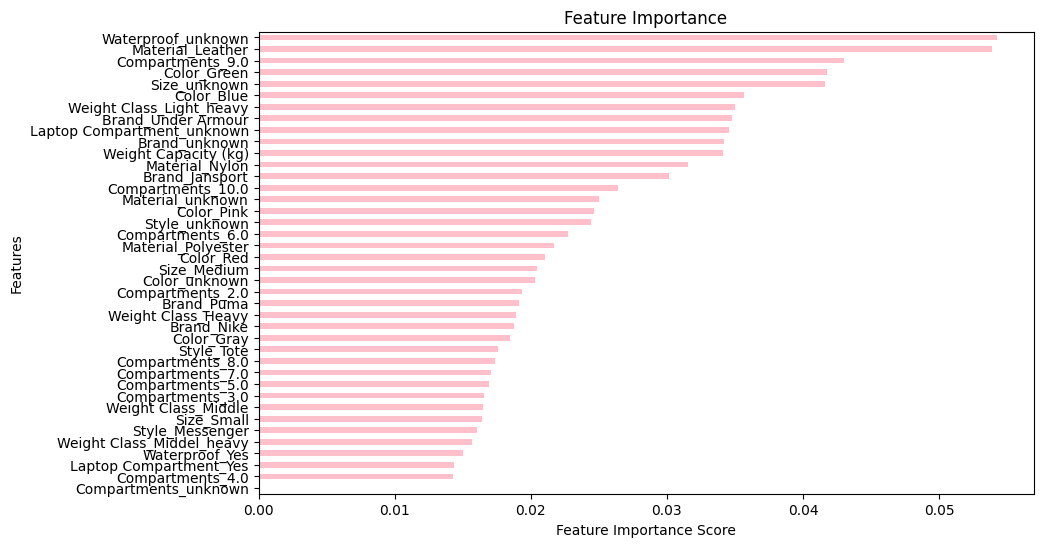

In [29]:
curr_train_data = train_data.drop("id", axis=1)
get_feature_importance(curr_train_data)

In [30]:

# Define bins and labels
bins = [5, 10, 15, 20, 25, 30]  # Bin edges
labels = ['Light', 'Middle', 'Light_heavy', 'Middel_heavy','Heavy']  # Bin names

# Apply binning
train_data["Weight Class"] = pd.cut(train_data["Weight Capacity (kg)"], bins=bins, labels=labels)



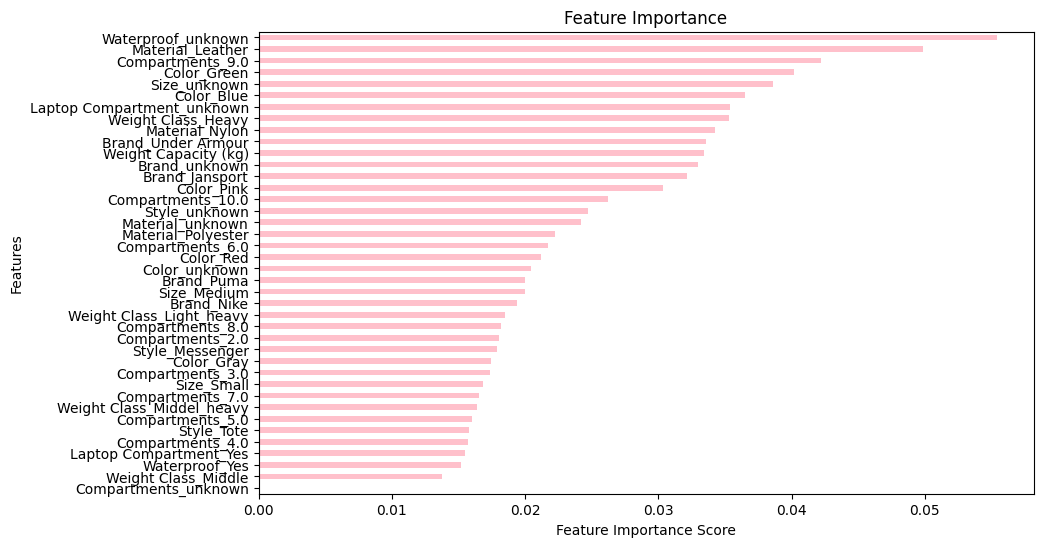

In [31]:
curr_train_data = train_data.drop("id", axis=1)
get_feature_importance(curr_train_data)

## Model Training


In [32]:
from sklearn.model_selection import train_test_split

X = train_data.drop(['Price', 'id'], axis=1)
X = pd.get_dummies(X, drop_first=True) 
y = train_data['Price']


# Split the indices of the train data
train_id, val_id = train_test_split(train_data.index, test_size=0.3, random_state=42)

# Split train and validation data
X_train,X_val,y_train,y_val = X.iloc[train_id],X.iloc[val_id],y.iloc[train_id],y.iloc[val_id]  

In [33]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

def objective(trial):
    
    params = {
        "n_estimators": 100,
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "eval_metric": "rmse",
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.1),
        "min_child_weight": trial.suggest_int("min_child_weight", 0.01, 1),
        "subsample": trial.suggest_loguniform("subsample", 0.1, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.1, 1),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.1, 1),
        "colsample_bynode": trial.suggest_float("colsample_bynode", 0.1, 1),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.01, 1),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.01, 1)
    }
    
    model = XGBRegressor(tree_method = "hist", device = "cuda", **params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    
    return mean_squared_error(y_val, y_pred, squared = False)



In [34]:
# study = optuna.create_study(direction="minimize")
# study.optimize(objective, n_trials=20, show_progress_bar=True)

# print("Best Parameters:", study.best_params)

In [35]:
# final_params = study.best_params

In [36]:
# with open('best_params.pickle', 'rb') as handle:
#     final_params = pickle.load(handle)

# print(final_params)

In [37]:
final_params = {'n_estimators': 740, 'max_depth': 8, 'learning_rate': 0.010546472834610132, 
                'min_child_weight': 0, 'subsample': 0.8582758544558543, 'colsample_bylevel': 0.8391094978249736, 
                'colsample_bytree': 0.6101846215740137, 'colsample_bynode': 0.9759001162694103, 'reg_alpha': 0.9944284361194279, 
                'reg_lambda': 0.9915590337828524}

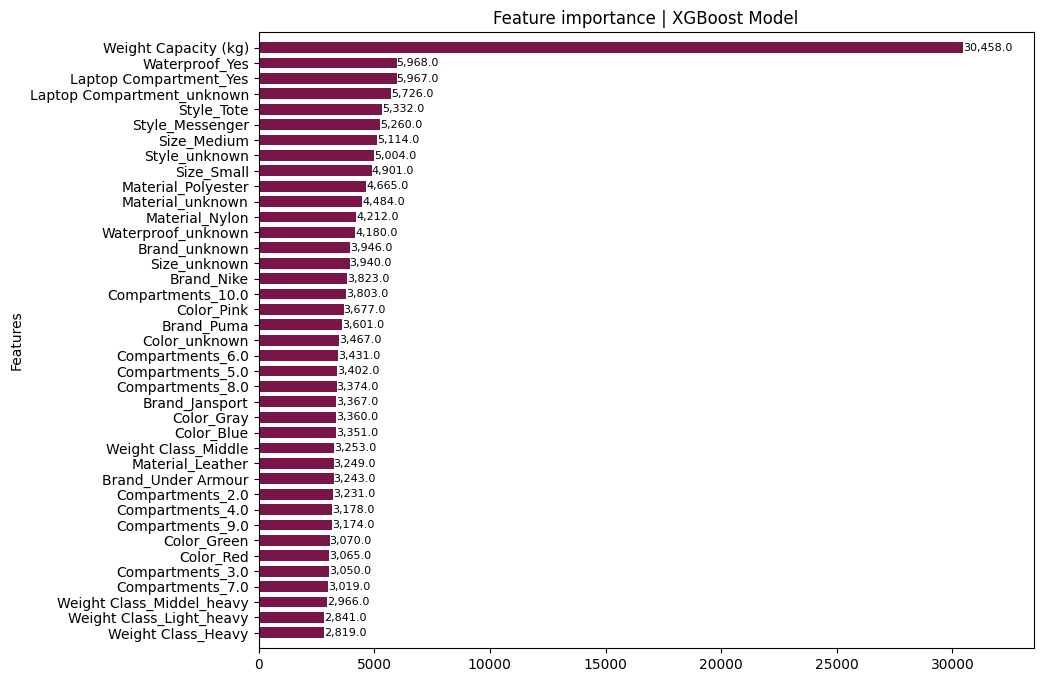

In [38]:
from xgboost import plot_importance

xgb = XGBRegressor(**final_params,
                   eval_metric = "rmse",
                   enable_categorical = True)

xgb.fit(X_train, y_train)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax = plot_importance(
    xgb,
    show_values=False,
    title= "Feature importance | XGBoost Model",
    ax=ax,
    xlabel="",
    height=0.7,
    color="#7a1549",
)
ax.bar_label(ax.containers[0], fmt="{:,.01f}", fontsize = 8)
ax.grid(False)

plt.show()

In [39]:
val_pred = xgb.predict(X_val)
score = mean_squared_error(y_val, val_pred, squared = False)
print(score)

38.85144797497721


In [40]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def train_xgboost_kfold(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)  # 5-fold cross-validation
    fold_scores = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        print(f"Training Fold {fold+1}/{n_splits}")

        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = xgb.XGBRegressor(**final_params, 
                                 n_estimators = 100, 
                                 eval_metric = "rmse",
                                 enable_categorical = True)

        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)  # RMSE
        fold_scores.append(rmse)

        print(f"Fold {fold+1} RMSE: {rmse:.4f}")

    print("\n✅ Final Average RMSE:", np.mean(fold_scores))
    return model  # Return last trained model


In [41]:
def preprocess_data(data):

    for col in continuous_cols:
        if col!="Price":
            data.fillna({col : data[col].mean()}, inplace=True)

    for col in categorical_cols:
        
        data[col] = data[col].astype("category")  # Ensure it's categorical
        if "unknown" not in data[col].cat.categories:
            data[col] = data[col].cat.add_categories(["unknown"])  # Add "unknown"
        data.fillna({col : "unknown"}, inplace=True)  # Now, fill missing values

    
    # Define bins and labels
    bins = [5, 10, 15, 20, 25, 30]  # Bin edges
    labels = ['Light', 'Middle', 'Light_heavy', 'Middel_heavy','Heavy']  # Bin names

    # Apply binning
    data["Weight Class"] = pd.cut(data["Weight Capacity (kg)"], bins=bins, labels=labels)

    data = data.drop('id', axis=1)
    data = pd.get_dummies(data, drop_first=True) 

    return data

    



In [42]:
preprocess_data(test_data)

,Weight Capacity (kg),Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Brand_unknown,Material_Leather,Material_Nylon,Material_Polyester,Material_unknown,...,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red,Color_unknown,Weight Class_Middle,Weight Class_Light_heavy,Weight Class_Middel_heavy,Weight Class_Heavy
0,20.671147,False,False,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,13.564105,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
2,11.809799,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,18.477036,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
4,9.907953,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,7.383498,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
199996,6.058394,False,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
199997,26.890163,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
199998,25.769153,False,False,True,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True


In [43]:
X_val

,Weight Capacity (kg),Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Brand_unknown,Material_Leather,Material_Nylon,Material_Polyester,Material_unknown,...,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red,Color_unknown,Weight Class_Middle,Weight Class_Light_heavy,Weight Class_Middel_heavy,Weight Class_Heavy
56569,23.082638,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1183394,26.094986,True,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
855407,12.137110,False,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
239037,19.868743,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
1855852,27.639291,False,True,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315874,29.706769,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
18017,6.568745,False,False,True,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3360137,18.913603,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2070737,18.781072,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False


In [44]:
y_test_pred = xgb.predict(preprocess_data(test_data))



In [45]:
submission = pd.DataFrame({'id': test_data.id, 'Price': y_test_pred})
submission.to_csv('submission.csv', index=False)

In [46]:
submission

,id,Price
0,300000,80.667351
1,300001,82.672073
2,300002,82.910538
3,300003,81.497391
4,300004,78.180222
...,...,...
199995,499995,79.673866
199996,499996,78.024574
199997,499997,81.961624
199998,499998,81.478653


In [47]:
pd.read_csv("/kaggle/input/playground-series-s5e2/sample_submission.csv")

,id,Price
0,300000,81.411
1,300001,81.411
2,300002,81.411
3,300003,81.411
4,300004,81.411
...,...,...
199995,499995,81.411
199996,499996,81.411
199997,499997,81.411
199998,499998,81.411
